### Treść zadania

###### Omów (bez implementacji) w jaki sposób można rozwiązać problem znajdowania maksymalnego przepływu w sieci o kilku źródłach i kilku ujściach.

### Omówienie algorytmu

Wystarczy dodać sztuczne źródło i sztuczne ujście (sztuczne źródło łączymy ze wszystkimi rzeczywistymi źródłami, a ujście z ujściami) (podobnie jak w algorytmie wyznaczania maksymalnych skojarzeń w grafach dwudzielnych), nadając im wagi wystarczająco wysokie, aby nie ograniczały one przepływu w sieci, a więc najlepiej wagi $ \infty $. Problem następnie rozwiązujemy w taki sam sposób, jak dla zwykłego grafu skierowanego, rozpoczynając algorytm w sztucznie dodanym źródle i szukając ściezkek powiększających do sztucznie dodanegu ujścia.

### Złożoność

Zależna od użytego algorytmu znajdowania maksymalnego przepływu. Ja skorzystam z algorytmu Edmondsa-Karpa.
###### Obliczeniowa:
$ O(VE^2) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [1]:
from queue import Queue


def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v, _ = G[u][i]
            G[v].append((u, 0))  # Add an edge with no weight
            
    return counts
    
    
def remove_back_edges(G, counts):
    n = len(G)
    
    for u in range(n):
        while len(G[u]) > counts[u]:
            G[u].pop()


def update_flow(flow, parents, bottleneck, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += bottleneck
        flow[u][v] -= bottleneck
        u = v


def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    parents  = [None] * n
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    counts = add_back_edges(G)
    
    while True:
        bottleneck = inf
        q = Queue()
        q.put((s, bottleneck))
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u, bottleneck = q.get()
            
            if u == t:
                update_flow(flow, parents, bottleneck, t)
                found_path = True
                break
            
            for v, capacity in G[u]:
                remaining = capacity - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put((v, min(remaining, bottleneck)))
        
        if not found_path: break
        max_flow += bottleneck
        token += 1
        
    remove_back_edges(G, counts)
        
    return max_flow


def add_source_and_sink(G: 'graph represented by adjacency lists', 
                        S: 'array of sources vertices indices',
                        T: 'array of sinks vertices indices'):
    n = len(G)
    inf = float('inf')
    G.append([])
    G.append([])
    
    for s in S:
        G[n].append((s, inf))
    
    for t in T:
        G[t].append((n + 1, inf))
        
    
def remove_source_and_sink(G: 'graph represented by adjacency lists', 
                           T: 'array of sinks vertices indices'):
    G.pop()
    G.pop()
    n = len(G)
    
    for t in T:
        G[t].pop()
        
        
def max_flow(G: 'graph represented by adjacency lists', 
             S: 'array of sources vertices indices',
             T: 'array of sinks vertices indices'):
    n = len(G)
    add_source_and_sink(G, S, T)
    result = edmonds_karp(G, n, n + 1)
    remove_source_and_sink(G, T)
    return result

###### Kilka testów

##### Pomocnicze

In [2]:
def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G

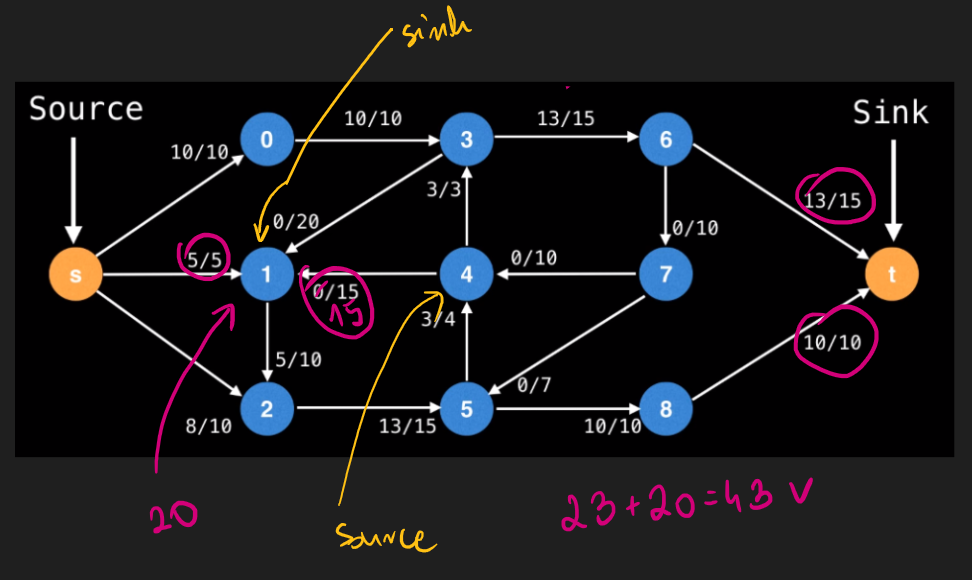

In [3]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]

S = [9, 4]
T = [1, 10]

G = directed_weighted_graph_list(E)

print(max_flow(G, S, T))

43
